In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
file_2015 = "Data/NCDB_2015.csv"
file_2016 = "Data/NCDB_2016.csv"
file_2017 = "Data/NCDB_2017.csv"

df_2015 = pd.read_csv(file_2015)
df_2016 = pd.read_csv(file_2016)
df_2017 = pd.read_csv(file_2017)

C:\Users\ivyfo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\ivyfo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_ncdb_2015_2016 = pd.concat([df_2015,df_2016])

In [4]:
df_ncdb = pd.concat([df_ncdb_2015_2016, df_2017])

In [5]:
df_ncdb.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,2015,1,1,16,2,1,04,01,2,4,...,01,2009,UU,U,UU,UU,U,UU,U,2218030
1,2015,1,1,16,2,1,04,01,2,4,...,01,2009,01,F,64,QQ,2,02,U,2218030
2,2015,1,1,07,2,2,31,02,4,3,...,01,2014,UU,U,UU,UU,U,UU,U,2218034
3,2015,1,1,07,2,2,31,02,4,3,...,01,2014,01,M,27,QQ,2,02,U,2218034
4,2015,1,1,07,2,2,31,02,4,3,...,01,2014,02,M,37,13,2,02,2,2218034


In [6]:
df_ncdb.dtypes

C_YEAR     int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE     int64
dtype: object

In [7]:
df_without_uu = df_ncdb[df_ncdb['C_MNTH']!='UU']

In [8]:
df_without_uu

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,2015,1,1,16,2,1,04,01,2,4,...,01,2009,UU,U,UU,UU,U,UU,U,2218030
1,2015,1,1,16,2,1,04,01,2,4,...,01,2009,01,F,64,QQ,2,02,U,2218030
2,2015,1,1,07,2,2,31,02,4,3,...,01,2014,UU,U,UU,UU,U,UU,U,2218034
3,2015,1,1,07,2,2,31,02,4,3,...,01,2014,01,M,27,QQ,2,02,U,2218034
4,2015,1,1,07,2,2,31,02,4,3,...,01,2014,02,M,37,13,2,02,2,2218034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289814,2017,12,7,19,2,01,QQ,02,2,2,...,NN,NNNN,01,U,UU,99,2,NN,3,2569967
289815,2017,12,7,22,2,01,04,01,4,5,...,05,2010,01,M,39,11,U,02,1,2570203
289816,2017,12,7,22,2,01,04,01,4,5,...,05,2010,02,M,61,13,U,02,2,2570203
289817,2017,12,7,22,2,01,04,01,4,5,...,05,2010,03,M,40,21,U,02,2,2570203


In [9]:
df_without_uu['C_MNTH'] = df_without_uu['C_MNTH'].astype(str).astype(int)

C:\Users\ivyfo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_without_uu.dtypes

C_YEAR     int64
C_MNTH     int32
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE     int64
dtype: object

In [11]:
df_without_uu.groupby(['C_YEAR', 'C_MNTH']).nunique()['C_CASE']

C_YEAR  C_MNTH
2015    1         10740
        2          9783
        3          7840
        4          7445
        5          9468
        6         10199
        7         10739
        8         10379
        9         10372
        10        10523
        11        10382
        12        10178
2016    1          9896
        2          8831
        3          7959
        4          8056
        5          9611
        6         10579
        7         10522
        8         10646
        9         10557
        10        10359
        11        10472
        12        10702
2017    1          9005
        2          8017
        3          8064
        4          7552
        5          9301
        6         10182
        7         10301
        8         10135
        9         10314
        10        10277
        11        10549
        12        10709
Name: C_CASE, dtype: int64

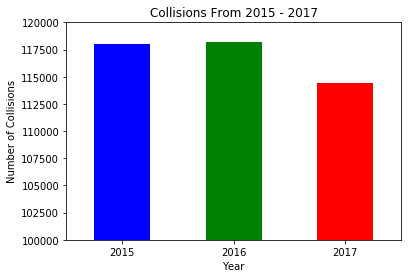

In [12]:

df_without_uu.groupby(['C_YEAR']).nunique()['C_CASE'].plot(kind = 'bar', color=['b','g','r'])
plt.title("Collisions From 2015 - 2017")
plt.xlabel("Year")
plt.xticks(rotation='horizontal')
plt.ylabel("Number of Collisions")
plt.ylim(100000, 120000)
plt.savefig('Collisions By Year.png')

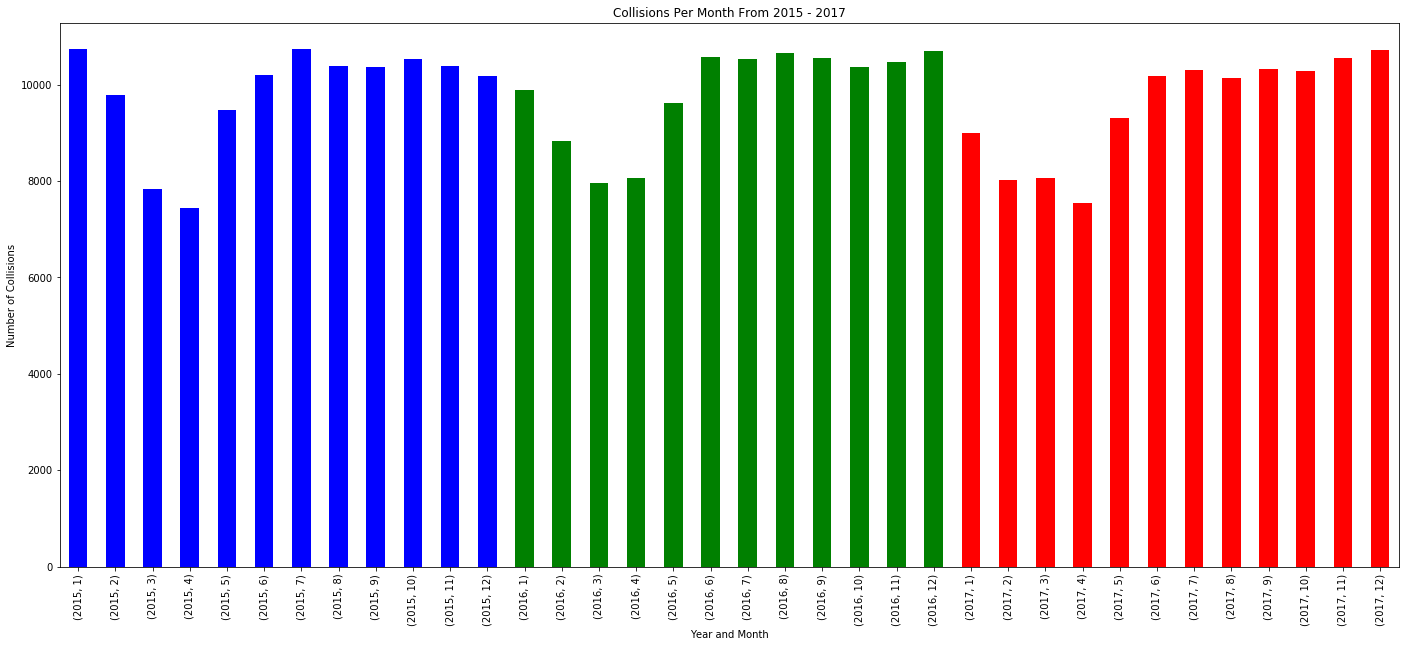

In [13]:
x_axis= np.arange(len(df_without_uu))
tick_locations= [value for value in x_axis]
plt.figure(figsize=(24,10))
df_without_uu.groupby(['C_YEAR', 'C_MNTH']).nunique()['C_CASE'].plot(kind='bar', color=['b','b','b','b','b','b','b','b','b','b','b','b',
         'g','g','g','g','g','g','g','g','g','g','g','g',
         'r','r','r','r','r','r','r','r','r','r','r','r'])
# Set a Title and labels
plt.title("Collisions Per Month From 2015 - 2017")
plt.xlabel("Year and Month")
plt.ylabel("Number of Collisions")
plt.savefig('Collisions By Year and Month.png')


In [14]:
df_weather = df_ncdb[(df_ncdb['C_WTHR']!='U') & (df_ncdb['C_WTHR']!='Q')]

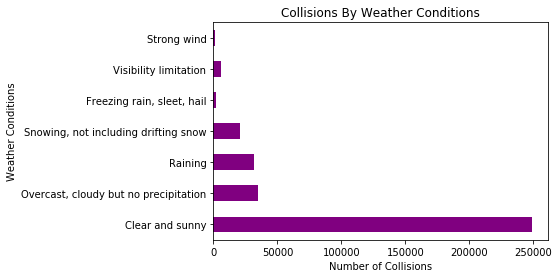

In [15]:
df_weather.groupby(['C_WTHR']).nunique()['C_CASE'].plot(kind = 'barh', color = 'purple')
weather_conditions = ['Clear and sunny','Overcast, cloudy but no precipitation','Raining',
                      'Snowing, not including drifting snow','Freezing rain, sleet, hail',
                      'Visibility limitation','Strong wind']
y_axis= np.arange(len(weather_conditions))
tick_locations= [value for value in y_axis]
plt.yticks(tick_locations, weather_conditions)
plt.title("Collisions By Weather Conditions")
plt.ylabel("Weather Conditions")
plt.xlabel("Number of Collisions")
plt.savefig('Collisions By Weather Conditions.png')

In [16]:
df_road_surface = df_ncdb[(df_ncdb['C_RSUR']!='U') & (df_ncdb['C_RSUR']!='Q')]

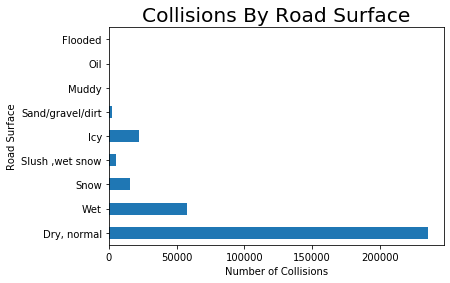

In [17]:
df_road_surface.groupby(['C_RSUR']).nunique()['C_CASE'].plot(kind = 'barh')
rsur_labels = ['Dry, normal','Wet','Snow','Slush ,wet snow','Icy',
   'Sand/gravel/dirt', 'Muddy', 'Oil', 'Flooded']
y_axis= np.arange(len(rsur_labels))
tick_locations= [value for value in y_axis]
plt.yticks(tick_locations, rsur_labels)
#plt.set_facecolor("lightslategray")
plt.style.use('fivethirtyeight')
plt.title("Collisions By Road Surface")
plt.ylabel("Road Surface")
plt.xlabel("Number of Collisions")
plt.savefig('Collisions By Road Surface.png')

In [18]:
df_without_uu_driver = df_without_uu.loc[df_without_uu['P_PSN']=="11",:]
df_without_uu_driver.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
7,2015,1,1,16,2,2,04,01,4,3,...,01,2000,01,M,35,11,2,02,1,2218037
21,2015,1,1,12,2,1,02,01,1,3,...,01,2003,01,M,21,11,1,02,1,2218077
36,2015,1,1,06,2,2,02,02,1,1,...,01,2005,01,M,39,11,2,02,1,2220701
41,2015,1,1,18,2,1,03,01,6,4,...,01,2009,04,F,50,11,1,02,1,2220727
42,2015,1,1,08,2,1,04,01,1,5,...,01,2008,01,F,32,11,2,02,1,2220728


In [19]:
# df_without_uu_user = df_without_uu.loc[df_without_uu['P_USER']=="1",:]
# df_without_uu_user['P_AGE'].value_counts()
# df_driver_without_uu=df_ncdb[(df_ncdb['P_AGE']!='UU')|(df_ncdb['P_AGE']!='NN')]
df_driver_age = df_ncdb[(df_ncdb['P_AGE']!='UU') & (df_ncdb['P_AGE']!='NN')]
#df_driver_age.plot(kind = 'bar')


In [20]:
df_driver_age['P_AGE'] = df_driver_age['P_AGE'].astype(str).astype(int)
#df_driver_age.dtypes
age_bins = [0,16,26,36,46,56,76,99]
age_names = ["<16","16-26","26-36","36-46","46-56","56-76",">76"]
df_driver_age['P_AGE_bins'] = pd.cut(df_driver_age['P_AGE'],age_bins,labels=age_names)
df_driver_age



C:\Users\ivyfo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ivyfo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE,P_AGE_bins
1,2015,1,1,16,2,1,04,01,2,4,...,2009,01,F,64,QQ,2,02,U,2218030,56-76
3,2015,1,1,07,2,2,31,02,4,3,...,2014,01,M,27,QQ,2,02,U,2218034,26-36
4,2015,1,1,07,2,2,31,02,4,3,...,2014,02,M,37,13,2,02,2,2218034,36-46
6,2015,1,1,07,2,2,31,02,4,3,...,2010,01,M,43,QQ,1,02,U,2218034,36-46
7,2015,1,1,16,2,2,04,01,4,3,...,2000,01,M,35,11,2,02,1,2218037,26-36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289836,2017,UU,U,UU,2,UU,UU,01,U,U,...,UUUU,01,F,20,11,1,NN,1,2455828,16-26
289837,2017,UU,U,UU,2,UU,UU,01,U,U,...,UUUU,01,F,47,11,1,NN,1,2455828,46-56
289838,2017,UU,U,UU,2,UU,UU,01,U,U,...,UUUU,01,M,24,11,1,NN,1,2455828,16-26
289839,2017,UU,U,23,2,01,03,01,1,1,...,UUUU,01,M,45,96,2,09,U,2570233,36-46


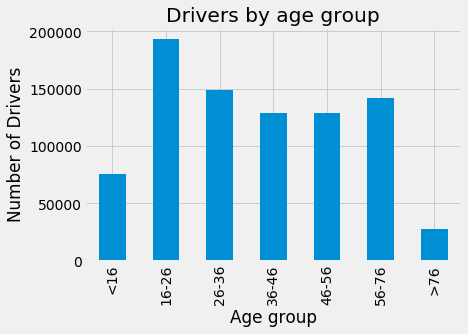

In [21]:
df_driver_age.groupby(['P_AGE_bins']).count()['C_CASE'].plot(kind = 'bar')

x_axis= np.arange(len(age_names))
tick_locations= [value for value in x_axis]


plt.xticks(tick_locations, age_names)
plt.title("Drivers by age group")
plt.xlabel("Age group")
plt.ylabel("Number of Drivers")
plt.savefig('Drivers By age group.png')

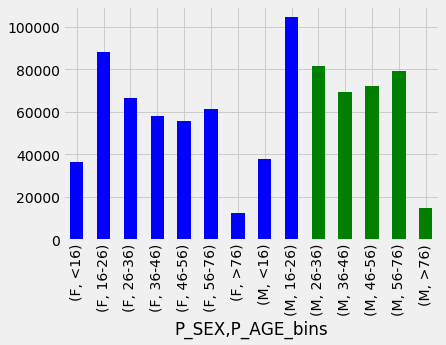

In [22]:

df_driver_gender_wo_UN = df_driver_age[(df_driver_age['P_SEX']!='U') & (df_driver_age['P_SEX']!='N')]
df_driver_gender_wo_UN.groupby(['P_SEX','P_AGE_bins']).count()['C_CASE'].plot(kind = 'bar', 
                color=['b','b','b','b','b','b','b','b','b','g','g','g','g','g','g','g','g','g'] )

# x_axis= np.arange(len(age_names))
# tick_locations= [value for value in x_axis]


# plt.xticks(tick_locations, age_names)
# plt.title("Drivers by age group")
# plt.xlabel("Age group")
# plt.ylabel("Number of Drivers")
# plt.savefig('Drivers By age group.png')

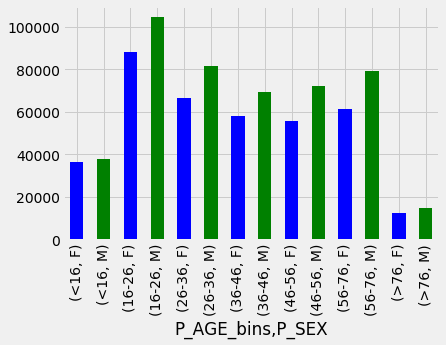

In [23]:
df_driver_gender_wo_UN = df_driver_age[(df_driver_age['P_SEX']!='U') & (df_driver_age['P_SEX']!='N')]
df_driver_gender_wo_UN.groupby(['P_AGE_bins', 'P_SEX']).count()['C_CASE'].plot(kind = 'bar',
color=['b','g','b','g','b','g','b','g','b','g','b','g','b','g','b','g','b','g'] )

In [24]:
#df_without_uu_driver.describe

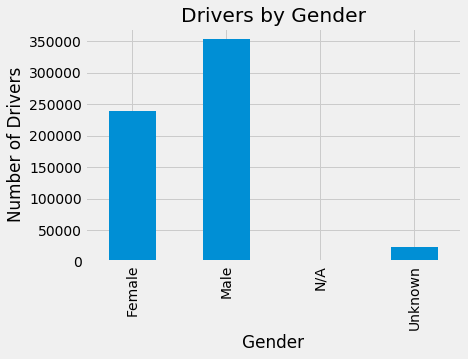

In [25]:
df_without_uu_driver.groupby(['P_SEX']).count()['C_CASE'].plot(kind = 'bar')

Cis_gender_labels = ['Female','Male','N/A','Unknown']
x_axis= np.arange(len(Cis_gender_labels))
tick_locations= [value for value in x_axis]


plt.xticks(tick_locations, Cis_gender_labels)
plt.title("Drivers by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Drivers")
plt.savefig('Drivers By Gender.png')

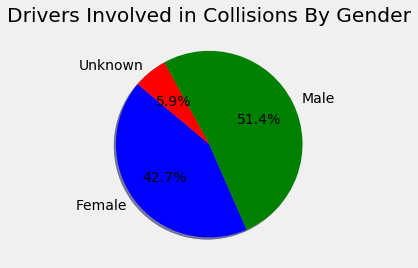

In [26]:
gender_list = df_without_uu.groupby(['P_SEX']).count()['C_CASE'].tolist()

del gender_list[2]

gender_labels = ['Female','Male','Unknown']
#gender_list_without_na = gender_list.iloc[[0,1,3],:]
#gender_list_without_na

colors = ["Blue", "Green", "Red"]
plt.pie(gender_list,labels=gender_labels, colors= colors ,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Drivers Involved in Collisions By Gender")
plt.savefig('Collisions By Gender.png')

In [27]:
del gender_list[2]
gender_list

[387159, 466606]

In [28]:
df_hours_without_uu = df_ncdb[(df_ncdb['C_HOUR']!='UU')]

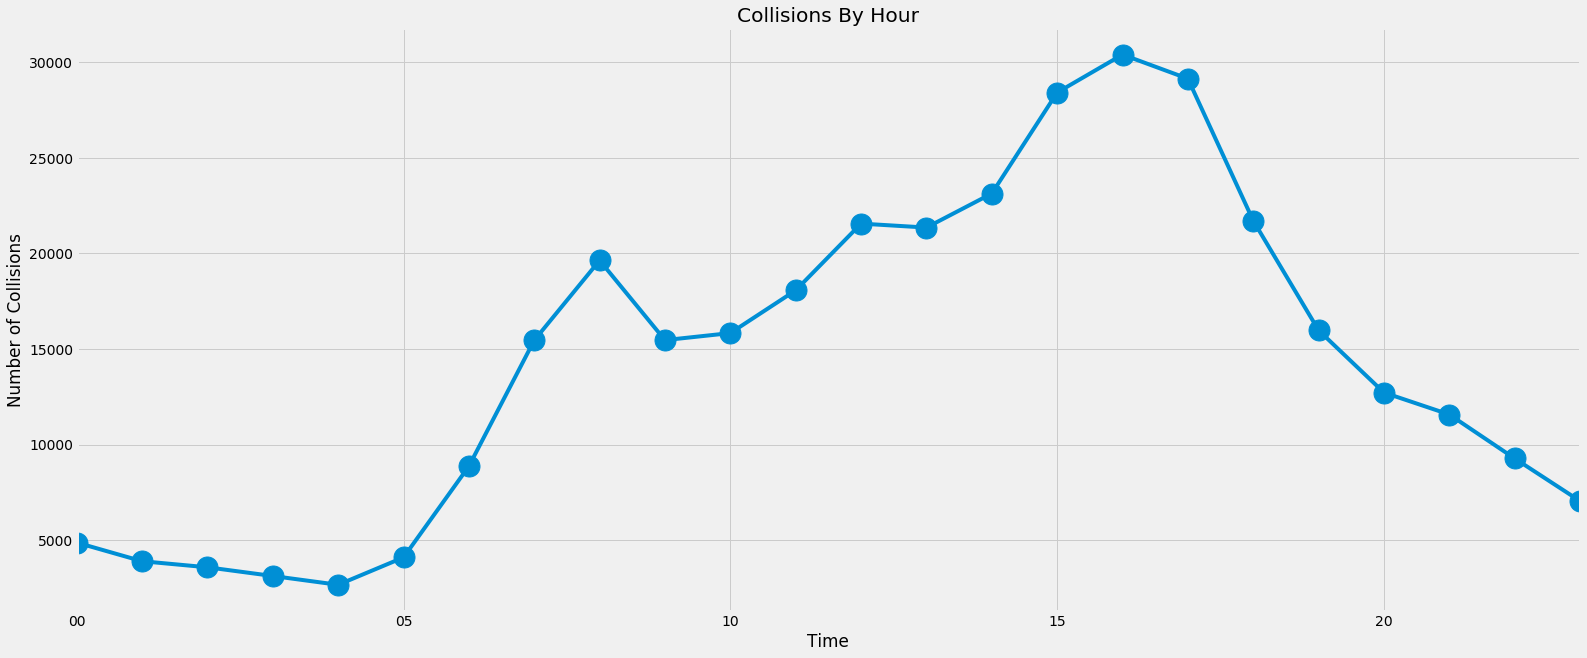

In [29]:

plt.figure(figsize=(24,10))
df_hours_without_uu.groupby(['C_HOUR']).nunique()['C_CASE'].plot(kind='line', marker='o', ms=21)
# Set a Title and labels
plt.title("Collisions By Hour")
plt.xlabel("Time")
plt.ylabel("Number of Collisions")
plt.savefig('Collisions By Hour.png')


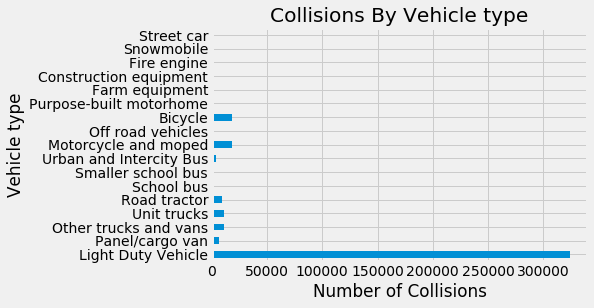

In [30]:
#gender_list = df_without_uu.groupby(['P_SEX']).count()['C_CASE'].tolist()

#del gender_list[2]

df_vehicle_type = df_ncdb[(df_ncdb['V_TYPE']!='UU') & (df_ncdb['V_TYPE']!='NN') & (df_ncdb['V_TYPE']!='QQ')]
# plt.figure(figsize=(24,10))
df_vehicle_type.groupby(['V_TYPE']).nunique()['C_CASE'].plot(kind='barh')
# #del gender_list[]

v_type_labels=['Light Duty Vehicle','Panel/cargo van','Other trucks and vans','Unit trucks','Road tractor','School bus',
            'Smaller school bus','Urban and Intercity Bus','Motorcycle and moped','Off road vehicles','Bicycle',
            'Purpose-built motorhome','Farm equipment','Construction equipment','Fire engine','Snowmobile','Street car']
y_axis= np.arange(len(v_type_labels))
tick_locations= [value for value in y_axis]
plt.yticks(tick_locations, v_type_labels)


#Set a Title and labels
plt.title("Collisions By Vehicle type")
plt.ylabel("Vehicle type")
plt.xlabel("Number of Collisions")
plt.savefig('Collisions By Vehicle type.png')


In [31]:
df_vehicle_type = df_ncdb[(df_ncdb['V_TYPE']!='UU') & (df_ncdb['V_TYPE']!='NN')]

In [32]:
v_type_list = df_without_uu.groupby(['V_TYPE']).nunique()['C_CASE'].tolist()
del v_type_list[-3]
v_type_list

[323580,
 6564,
 11410,
 10985,
 9317,
 1139,
 51,
 4135,
 18327,
 954,
 18119,
 217,
 283,
 1109,
 73,
 352,
 251,
 2271,
 4189]

In [33]:
df_without_uu.groupby(['V_TYPE']).nunique()['C_CASE']

V_TYPE
01    323580
05      6564
06     11410
07     10985
08      9317
09      1139
10        51
11      4135
14     18327
16       954
17     18119
18       217
19       283
20      1109
21        73
22       352
23       251
NN     35517
QQ      2271
UU      4189
Name: C_CASE, dtype: int64

In [34]:
df_without_uu_driver.groupby(['P_AGE']).count()['C_CASE']

#plt.figure(figsize=(24,10))

# Cis_gender_labels = ['Female','Male','N/A','Unknown']
# x_axis= np.arange(len(Cis_gender_labels))
# tick_locations= [value for value in x_axis]


#plt.xticks(tick_locations, Cis_gender_labels)
# plt.title("Drivers by Age ")
# plt.xlabel("Gender")
# plt.ylabel("Number of Drivers")
# plt.savefig('Drivers By Gender.png')

P_AGE
01       81
02        5
03       10
04       10
05       34
      ...  
97       20
98        8
99       11
NN      215
UU    20558
Name: C_CASE, Length: 101, dtype: int64